In [54]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

#load data 
df=pd.read_csv("sales data.csv")

#show 1st 5 rows 
print('1st 5 rows')
print(df.head())

1st 5 rows
   Unnamed: 0  Order ID               Product  Quantity Ordered  Price Each  \
0           0    295665    Macbook Pro Laptop                 1     1700.00   
1           1    295666    LG Washing Machine                 1      600.00   
2           2    295667  USB-C Charging Cable                 1       11.95   
3           3    295668      27in FHD Monitor                 1      149.99   
4           4    295669  USB-C Charging Cable                 1       11.95   

            Order Date                        Purchase Address  Month  \
0  2019-12-30 00:01:00  136 Church St, New York City, NY 10001     12   
1  2019-12-29 07:03:00     562 2nd St, New York City, NY 10001     12   
2  2019-12-12 18:21:00    277 Main St, New York City, NY 10001     12   
3  2019-12-22 15:13:00     410 6th St, San Francisco, CA 94016     12   
4  2019-12-18 12:38:00           43 Hill St, Atlanta, GA 30301     12   

     Sales            City  Hour  
0  1700.00   New York City     0  
1   6

In [55]:
#Basic stats
print('basic stats')
print(df.describe())

basic stats
          Unnamed: 0       Order ID  Quantity Ordered     Price Each  \
count  185950.000000  185950.000000     185950.000000  185950.000000   
mean     8340.388475  230417.569379          1.124383     184.399735   
std      5450.554093   51512.737110          0.442793     332.731330   
min         0.000000  141234.000000          1.000000       2.990000   
25%      3894.000000  185831.250000          1.000000      11.950000   
50%      7786.000000  230367.500000          1.000000      14.950000   
75%     11872.000000  275035.750000          1.000000     150.000000   
max     25116.000000  319670.000000          9.000000    1700.000000   

               Month          Sales           Hour  
count  185950.000000  185950.000000  185950.000000  
mean        7.059140     185.490917      14.413305  
std         3.502996     332.919771       5.423416  
min         1.000000       2.990000       0.000000  
25%         4.000000      11.950000      11.000000  
50%         7.000000 

In [56]:
#check missing values
print(df.isnull().sum())

Unnamed: 0          0
Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
Sales               0
City                0
Hour                0
dtype: int64


In [ ]:
#data cleaning
df['Order Date']=pd.to_datetime(df["Order Date"])
df["City"]=df["City"].str.strip()
df.dropna(inplace=True)
print(df.to_string())

 

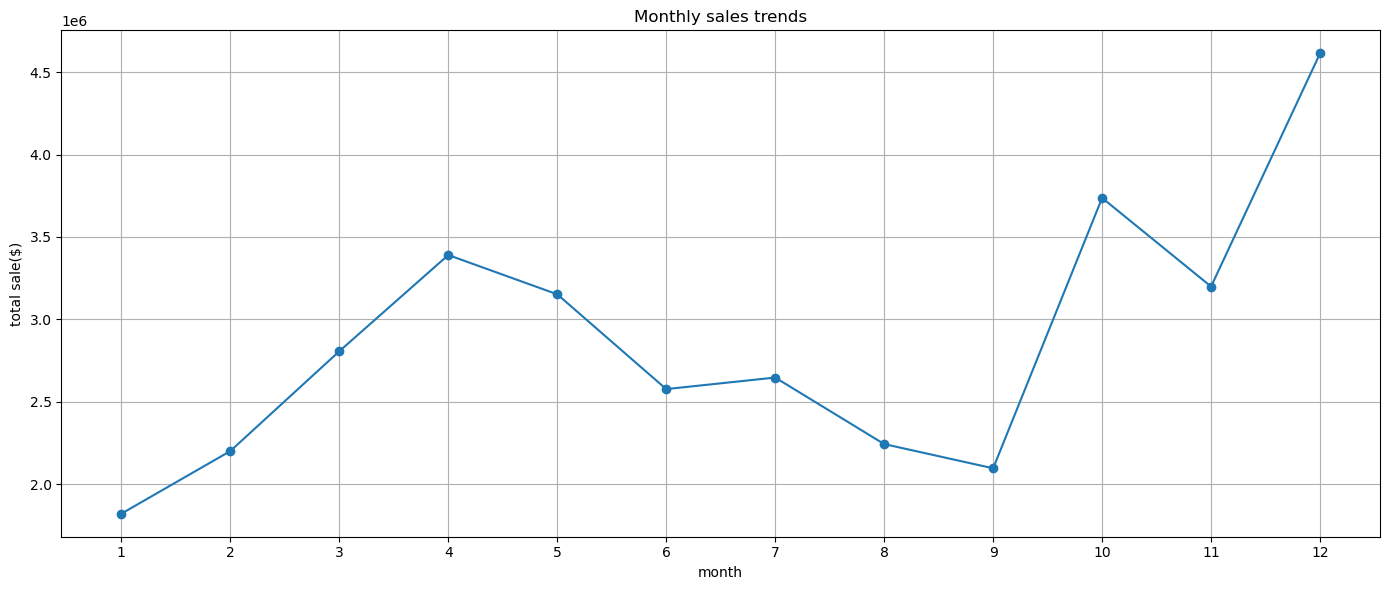

In [ ]:
#Sales by day of week
df['Day of Week']=df['Order Date'].dt.day_name()
plt.figure(figsize=(12,6))
day_sales=df.groupby('Day of Week')['Sales'].sum()
day_order=['Monday','Tuesday','Wednsday','Thursday','Friday','Saturday','Sunday']
day_sales=day_sales.reindex(day_order)
day_sales.plot(kind='bar')
plt.title('Sales by day of week')
plt.xlabel('Day of week')
plt.ylabel('Total sales($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

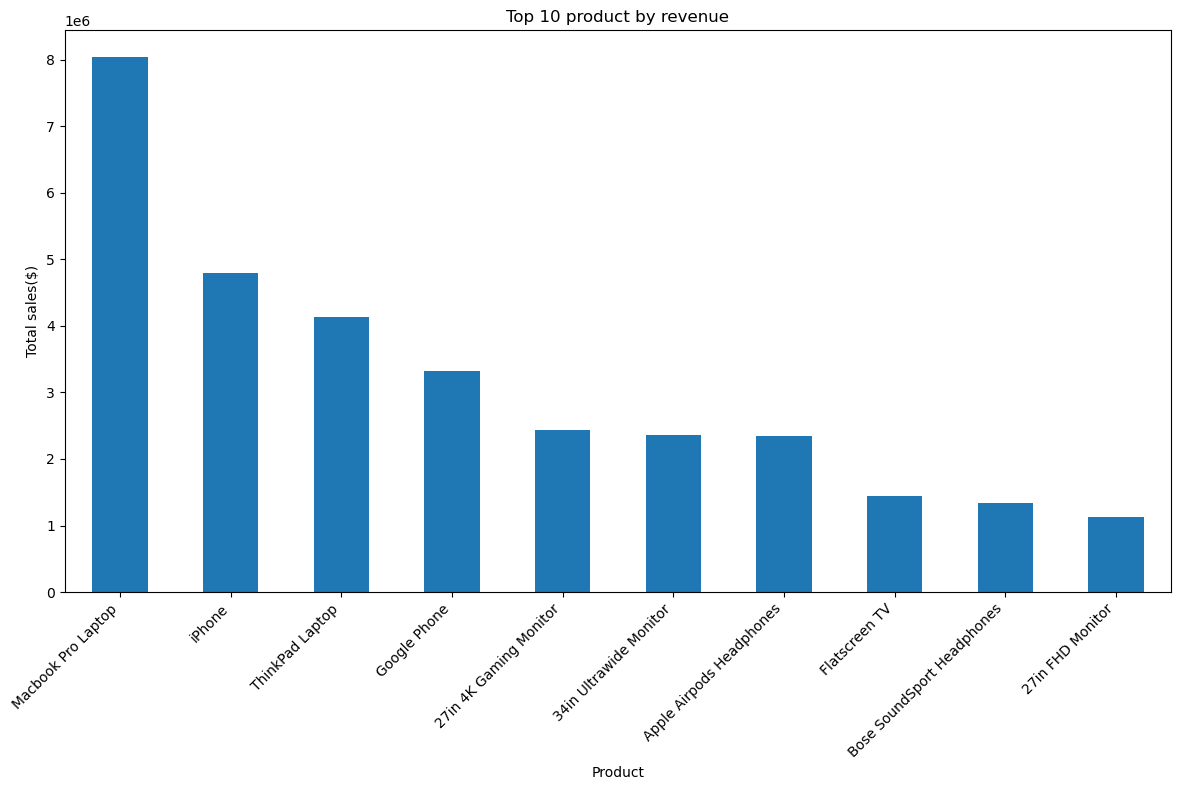

In [ ]:
#Top selling products by revenue
plt.figure(figsize=(12,8))
product_sales=df.groupby('Product')['Sales'].sum().sort_values(ascending=False).head(10)
product_sales.plot(kind='bar')
plt.title('Top 10 product by revenue')
plt.xlabel('Product')
plt.ylabel('Total sales($)')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.show()

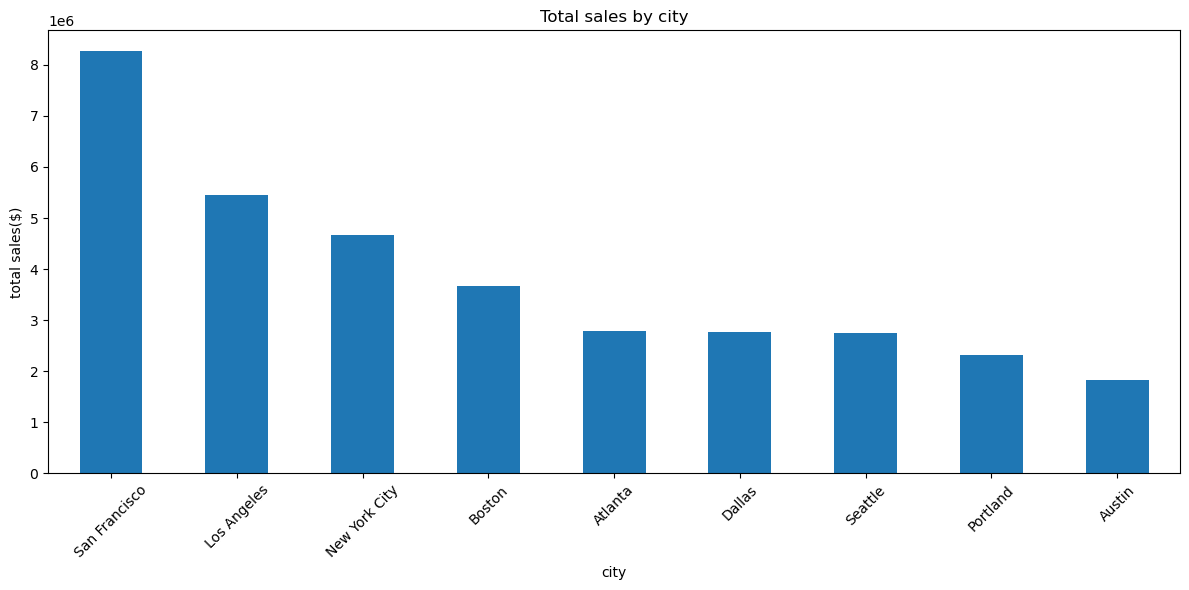

In [ ]:
#Sales by city
plt.figure(figsize=(12,6))
city_sales=df.groupby('City')['Sales'].sum().sort_values(ascending=False)
city_sales.plot(kind="bar")
plt.title('Total sales by city')
plt.xlabel('city')
plt.ylabel('total sales($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


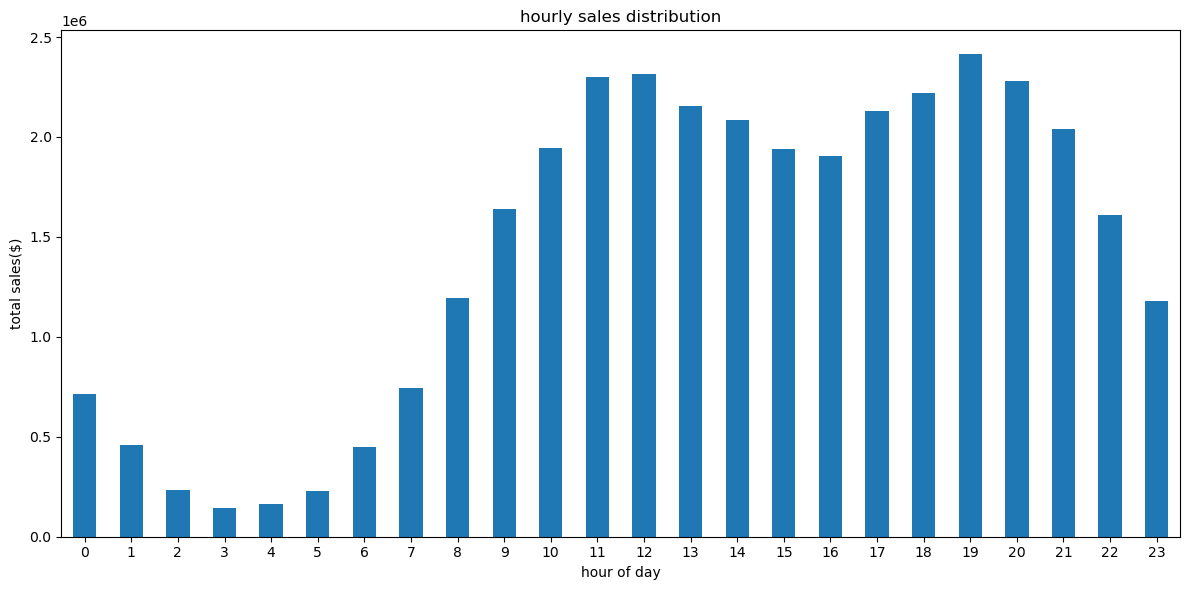

In [ ]:
#hourly sales pattern 
plt.figure(figsize=(12,6))
hourly_sales=df.groupby('Hour')['Sales'].sum()
hourly_sales.plot(kind='bar')
plt.title('hourly sales distribution')
plt.xlabel('hour of day')
plt.ylabel('total sales($)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

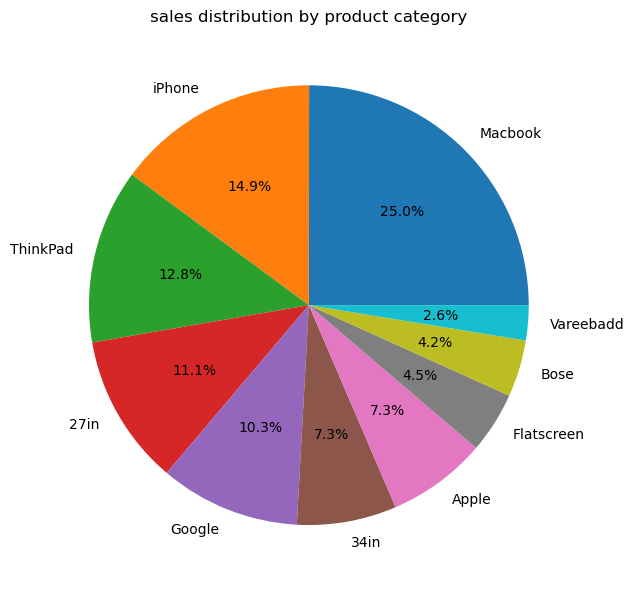

In [ ]:
#product category analysis
#first exract product categories
df['Product Category']=df['Product'].apply(lambda x:x.split()[0] if'' in x else x )

plt.figure(figsize=(12,6))
category_sales=df.groupby('Product Category')['Sales'].sum().sort_values(ascending=False).head(10)
category_sales.plot(kind='pie',autopct='%1.1f%%')
plt.title('sales distribution by product category')
plt.ylabel('')
plt.tight_layout()
plt.show()








 

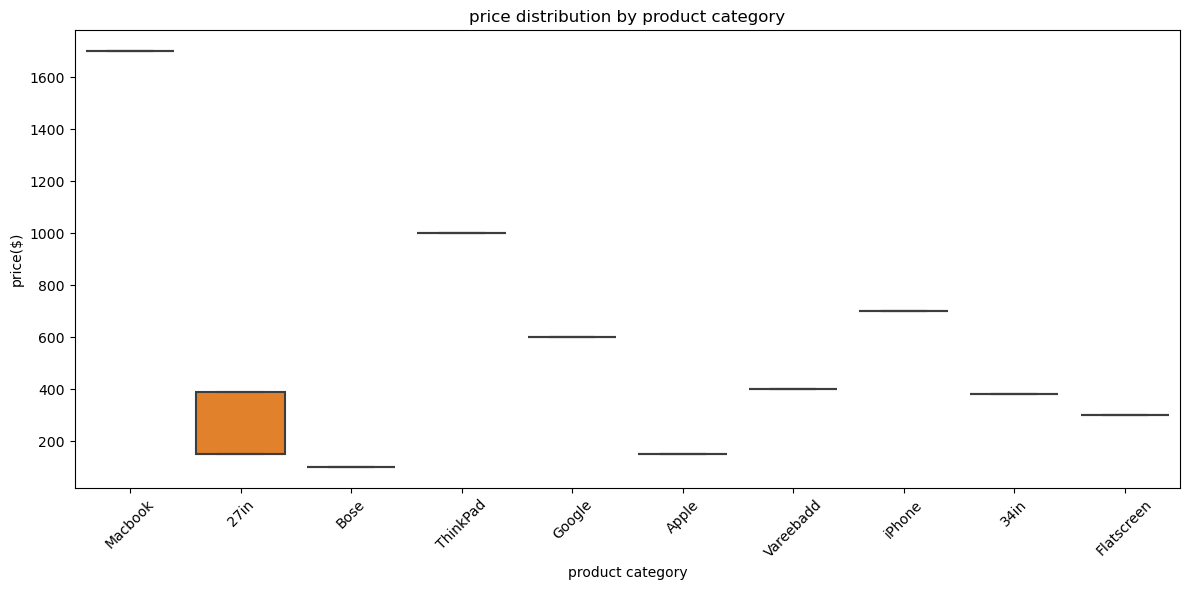

In [ ]:
#price distribution of product 
plt.figure(figsize=(12,6))
sns.boxplot(x='Product Category',y='Price Each',data=df[df['Product Category'].isin(category_sales.index)])
plt.title('price distribution by product category')
plt.xlabel('product category')
plt.ylabel('price($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

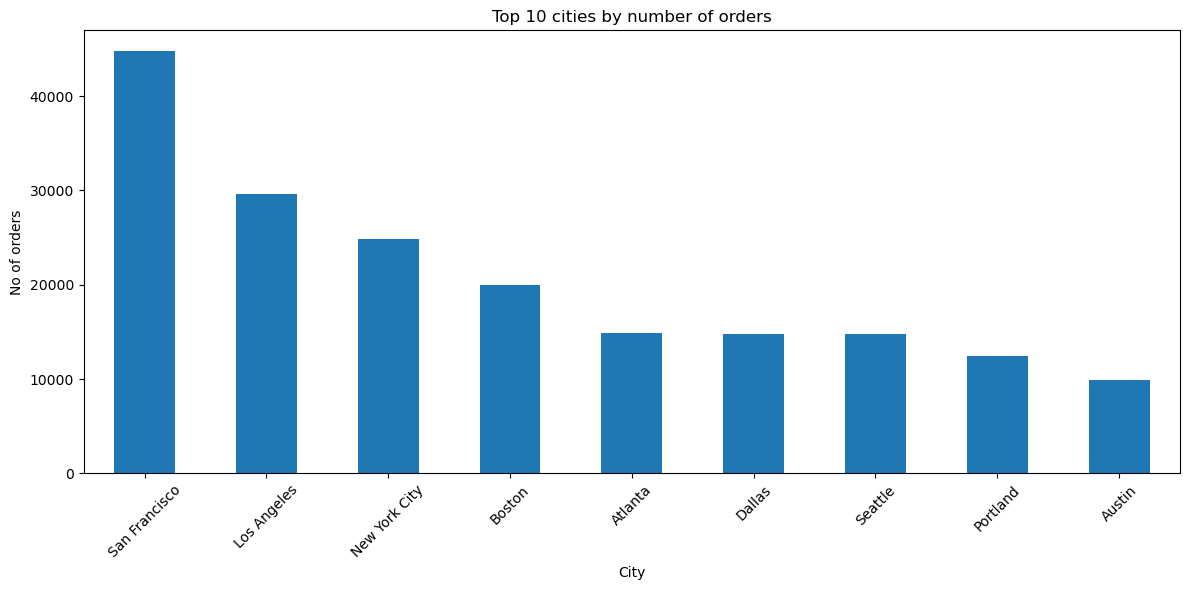

In [ ]:
#Topcities by number of order 
plt.figure(figsize=(12,6))
city_orders=df['City'].value_counts().head(10)
city_orders.plot(kind='bar')
plt.title('Top 10 cities by number of orders')
plt.xlabel('City')
plt.ylabel('No of orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

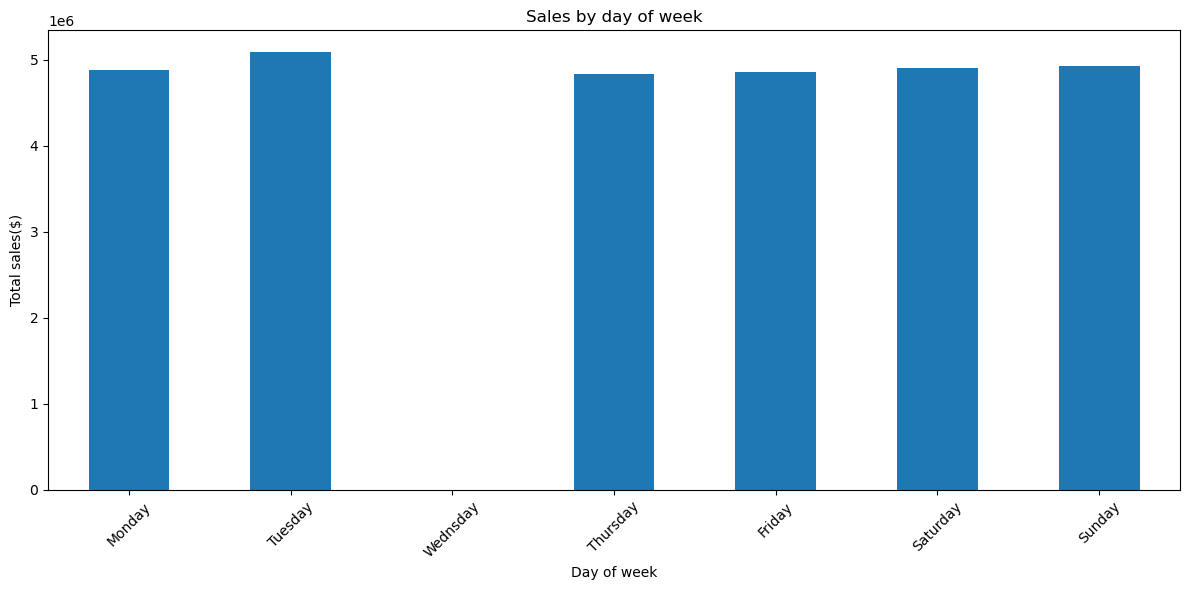

In [ ]:
#Sales by day of week
df['Day of Week']=df['Order Date'].dt.day_name()
plt.figure(figsize=(12,6))
day_sales=df.groupby('Day of Week')['Sales'].sum()
day_order=['Monday','Tuesday','Wednsday','Thursday','Friday','Saturday','Sunday']
day_sales=day_sales.reindex(day_order)
day_sales.plot(kind='bar')
plt.title('Sales by day of week')
plt.xlabel('Day of week')
plt.ylabel('Total sales($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()